<a href="https://colab.research.google.com/github/SiPilip/pytorch_course/blob/main/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device being used: {device}")

2.5.1+cu124
Device being used: cpu


## 3 Area industri dimana computer vision dapat digunakan

1. Manufaktur dan pabrik
2. Layanan kesehatan
3. Keamanan

## 2. Apa itu overfitting dalam pembelajaran mesin?

Overfitting dalam pembelajaran mesin adalah perilaku buruk dalam model karena model hanya terlalu pintar dan hanya beradaptasi hanya pada data latih, sehingga model buruk dalam memprediksi data selain dari data latih

![image.png](https://lh4.googleusercontent.com/Bn_4iQkQEzGebyCPpTdt0RbtipL3yI-1C2zZ0NihGz39MRTczKhVsj8Nk7cfKzNnVSplSaSeofMrYHejkm2Z5lCuCV-H_UQhP5B6I8j46TgrO-upFV-NjytJvJkWmn_uJTviS_-viBrMq20p0KiIric)

## 3.1 Mendeteksi apakah model kita terkena overfitting
Untuk mendeteksi model terkena overfitting adalah dengan menerapkan metode pengujian dengan K-fold cross-validation

Dalam metode ini data dibagi menjadi subset subset, dengan ukuran yang sama.
Tiap subset ini disebut sebagai fold

**Satu fold** nantinya akan bertindak sebagai data test

**Sisa fold** lainnya akan melatih model

**Lalu**, proses ini diulang hingga tiap fold mendapat giliran menjadi datatest

---

Nah, dari tiap evaluasi, skor fold dicatat, lalu dicari reratanya untuk menilai akurasi model

## 3.2 Mencegah model terkena overfitting

1. Melatih lebih banyak data
2. Lakukan seleksi fitur
3. Augmentasi data (sengaja memberikan noise pada data)

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
import torch
from torch import nn

import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu124
0.20.1+cu124


## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [4]:
from torchvision import datasets

train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 11.6MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 354kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.21MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.41MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [5]:
len(train_data), len(test_data)

(60000, 10000)

In [6]:
# Data pertama
image, label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [7]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [8]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [9]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [10]:
# Cek bentuk dari data gambar kita
print(f"Bentuk gambar: {image.shape} -> [color channels, height, weight]")
print(f"Image label: {class_names[label]}")

Bentuk gambar: torch.Size([1, 28, 28]) -> [color channels, height, weight]
Image label: 5 - five


## Visualisasi Data

Bentuk gambar: torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

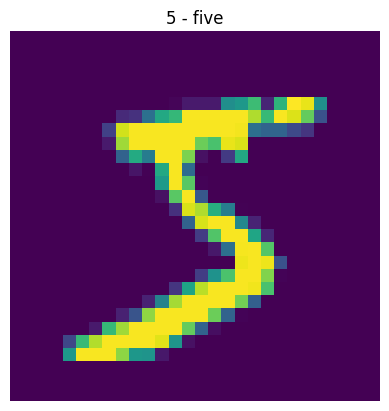

In [11]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Bentuk gambar: {image.shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label])
plt.axis(False)

(-0.5, 27.5, 27.5, -0.5)

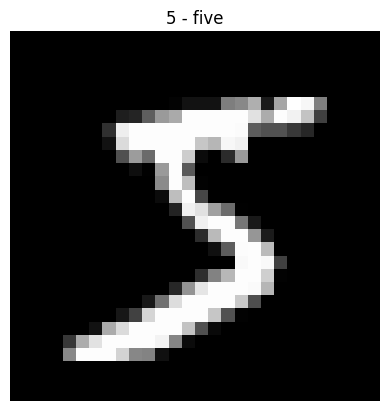

In [12]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

## Visualisasi gambar per class

In [13]:
train_data.classes[1]

'1 - one'

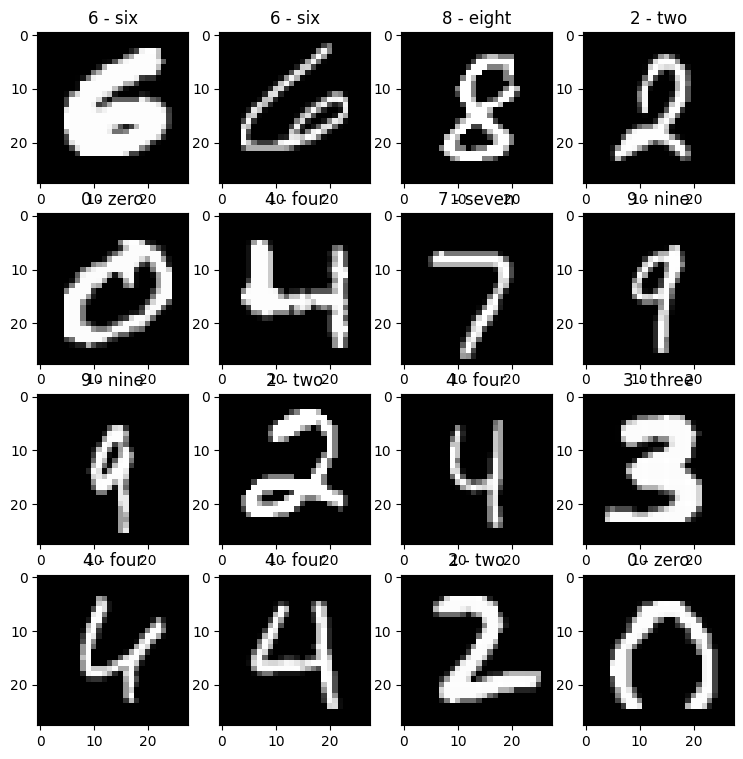

In [14]:
torch.manual_seed(42)

fig = plt.figure(figsize=(9,9))

rows, cols = 4, 4

for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis

In [15]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [16]:
from torch.utils.data import DataLoader

# Ukuran batch hyperparameter
BATCH_SIZE = 32

# Masukkan dataset kedalam batch
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d3e9e6d6190>,
 <torch.utils.data.dataloader.DataLoader at 0x7d3e9e5d7350>)

In [17]:
# Lihat dataloader
print(f"Dataloader: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloader: (<torch.utils.data.dataloader.DataLoader object at 0x7d3e9e6d6190>, <torch.utils.data.dataloader.DataLoader object at 0x7d3e9e5d7350>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [18]:
# Melihat kedalam training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [19]:
from torch import nn
class MNISTModel(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x

In [20]:
torch.manual_seed(42)
model = MNISTModel(input_shape=1,
                   hidden_units=10,
                   output_shape=len(class_names)).to(device)

In [21]:
rand_image_tensor = torch.rand(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [22]:
model(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0372, -0.0748,  0.0573, -0.0396, -0.0098,  0.0194, -0.0003, -0.0114,
          0.0206,  0.0003]], grad_fn=<AddmmBackward0>)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [23]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [24]:
# Buat loss_fn dan optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.1)

In [25]:
from tqdm.auto import tqdm

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Atur epochs
epochs = 3

# Waktunya berlatih!
for epoch in tqdm(range(epochs)):

  # Atur nilai train loss dan train accuracy
  train_loss, train_acc = 0, 0

  # Masuk mode train
  model.train()

  #=========BATCHES LOOP TRAINING===========
  for batch, (X,y) in enumerate(train_dataloader):
    # 0. Setup Device
    X, y = X.to(device), y.to(device)

    # 1. Forward Pass
    y_pred = model(X)

    # 2. Kalkulasi Loss dan Akurasi
    loss = loss_fn(y_pred, y)
    train_loss += loss

    accuracy = accuracy_fn(y_true=y,
                           y_pred=y_pred.argmax(dim=1))
    train_acc += accuracy

    # 3. Optimizer Zero Grad
    optimizer.zero_grad()

    # 4. Loss Backward
    loss.backward()

    # 5. Optimizer Step
    optimizer.step()

  # Bagi total train loss dan akurasi dengan panjang dari train dataloader
  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

  # ======TESTING======
  # Atur nilai test loss, dan test accuracy
  test_loss, test_acc = 0, 0

  # Letakkan model pada mode evaluasi
  model.eval()

  # Masuk kedalam inference mode
  with torch.inference_mode():
    for X, y in test_dataloader:
      # Kirim data ke dalam target
      X, y = X.to(device), y.to(device)

      # 1. Lakukan forwad pass
      test_pred = model(X)

      # 2. Kalkulasi loss dan accuracy
      loss =  loss_fn(test_pred,y)
      test_loss += loss

      accuracy = accuracy_fn(y_true=y,
                             y_pred=test_pred.argmax(dim=1))
      test_acc += accuracy

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")
    print("\n")

  0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 0.33561 | Train acc: 88.74%
Test loss: 0.07362 | Test acc: 97.71%


Train loss: 0.08217 | Train acc: 97.44%
Test loss: 0.06596 | Test acc: 97.95%


Train loss: 0.06436 | Train acc: 97.97%
Test loss: 0.05947 | Test acc: 98.04%




## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

##### Definisikan fungsi make_predictions untuk mencari prediksi dari data yang nanti akan kita ambil

In [26]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []

  model.to(device)
  model.eval()

  with torch.inference_mode():
    for sample in data:
      # Siapkan sampel
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (logits)
      pred_logit = model(sample)

      # Ambil prediksi probabilitas
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Ambil pred_prob
      pred_probs.append(pred_prob.cpu())

  # Ubah pred_probs untuk diubah ke tensor
  return torch.stack(pred_probs)

##### Ambil 9 data random dari dalam data test

In [27]:
import random
# random.seed(42)

test_samples = []
test_labels = []

for sample, label, in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

##### Visualisasi satu data dari data random yang sudah kita buat

(-0.5, 27.5, 27.5, -0.5)

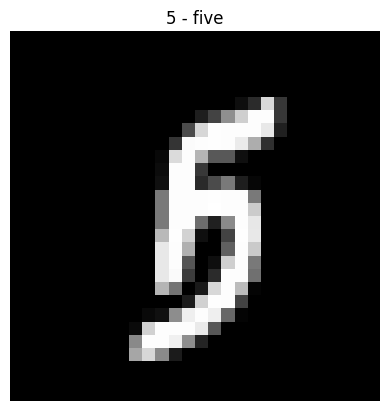

In [28]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])
plt.axis(False)

In [29]:
# Lakukan prediksi
pred_probs = make_predictions(model=model,
                              data=test_samples)

# Lihat 2 data pertama dari prediksi probabilitas (sebelum argmax)
pred_probs[:2]

tensor([[4.1869e-04, 1.4363e-06, 3.2802e-08, 7.4433e-04, 5.4704e-06, 9.8162e-01,
         6.8608e-03, 5.3012e-08, 2.0871e-03, 8.2620e-03],
        [1.3437e-08, 4.2424e-08, 5.7978e-09, 2.9143e-06, 1.7422e-08, 5.5342e-07,
         2.7267e-05, 1.4790e-11, 9.9995e-01, 2.3540e-05]])

In [30]:
# Konversi prediksi probabilitas kedalam label
pred_classes = pred_probs.argmax(dim=1)

##### Hasil kelas yang sudah di prediksi oleh model 🚀

In [31]:
pred_classes

tensor([5, 8, 9, 9, 7, 0, 2, 4, 5])

##### Labels / prediksi yang sebenarnya dari test label ✨

In [32]:
test_labels

[5, 8, 9, 9, 7, 0, 2, 4, 5]

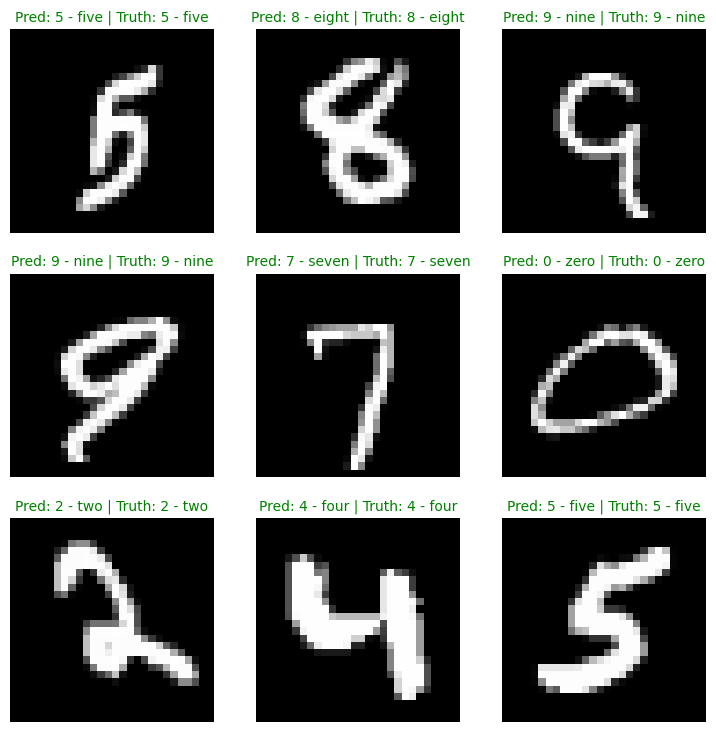

In [33]:
# Plot prediksi
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Buat suplot
  plt.subplot(nrows, ncols, i+1)

  # Plot target image
  plt.imshow(sample.squeeze(), cmap='gray')

  # Cari prediksi (dalam teks e.g. sandal)
  pred_label = class_names[pred_classes[i]]

  # Ambil label sebenarnya
  truth_label = class_names[test_labels[i]]

  # Ambil title dari plot nya
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Cek kesamaan dari pred dan label benar, dan ganti warna atau title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [34]:
# Lihat jika paket sudah terinstall didalam google collab
try:
  import torchmetrics, mlxtend
  assert int(mlxtend.__version__.split(".")[1] >= 19)
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.4 MB/s eta 0:00:00
mlxtend version: 0.23.4


In [ ]:
# Import tqdm.auto
from tqdm.auto import tqdm

# 1. Buat prediksi dengan model terlatih
y_preds = []
model.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Buat prediksi..."):
    # Kirim data dan target device
    X, y = X.to(device), y.to(device)

    # Buat forward pass
    y_logit = model(X)

    # Turn prediksi from logits -> prediksi probabilitas -> prediksi label
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

    # Letakkan prediksi pada cpu
    y_preds.append(y_pred.cpu())

# Konkatenasi list prediksi ke data tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

In [35]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Bangun confusion instance dan bandingkan prediksi terhadap label asli
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?